# First an example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as manimation

In [23]:
# Define the meta data for the movie
FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='Movie Test', artist='Matplotlib',
                comment='a red circle following a blue sine wave')
writer = FFMpegWriter(fps=15, metadata=metadata)

source: https://pythonnumericalmethods.berkeley.edu/notebooks/chapter12.04-Animations-and-Movies.html

In [ ]:
n = 1000
x = np.linspace(0, 6*np.pi, n)
y = np.sin(x)

# Initialize the movie
fig = plt.figure()

# plot the sine wave line
sine_line, = plt.plot(x, y, 'b')
red_circle, = plt.plot([], [], 'ro', markersize = 10)
plt.xlabel('x')
plt.ylabel('sin(x)')

# Update the frames for the movie
with writer.saving(fig, "writer_test.mp4", 100):
    for i in range(n):
        x0 = x[i]
        y0 = y[i]
        red_circle.set_data(x0, y0)
        writer.grab_frame()

In [ ]:
# don't worry about the code in this cell, it is just to let you 
# display the movies you generated above in Jupyter notebook
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="writer_test.mp4" type="video/mp4">
</video></div>""")

# Apply to moving nullclines

In [20]:
from plotting_vectorfield import nullclines_general

import matplotlib.pyplot as plt
import numpy as np
import os

from class_singlecell import SingleCell
from dynamics_generic import simulate_dynamics_general
from dynamics_vectorfields import set_ode_params, set_ode_vectorfield, ode_integration_defaults, PWL_I_of_t_pulse
from settings import STYLE_DYNAMICS, DIR_OUTPUT, PLOT_XLABEL, PLOT_YLABEL

In [21]:
sc_template_PWL3_swap = SingleCell(style_ode='PWL3_swap')
sc_template_PWL3_swap.params_ode['gamma'] = 1e-1
kwargs_PWL3_swap = {
    't': 0,    # this should have no affect on the autonomous equations
    'z': 0,  # note z represents the x-intercept of the dydt=0 nullcline
    'w': 0     # currently this has no affect
}

def pulse(t):
    return PWL_I_of_t_pulse(sc_template_PWL3_swap.params_ode, t)

...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...


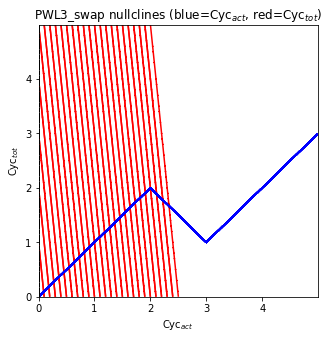

In [22]:
plt.figure(figsize=(5,5))
ax = plt.gca()

for t in np.linspace(0,100,101):
    kwargs_PWL3_swap['z'] = pulse(t)
    ax = nullclines_general(sc_template_PWL3_swap, ax=ax, delta=0.01, axlow=0, axhigh=5, contour_labels=False, **kwargs_PWL3_swap)

...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...


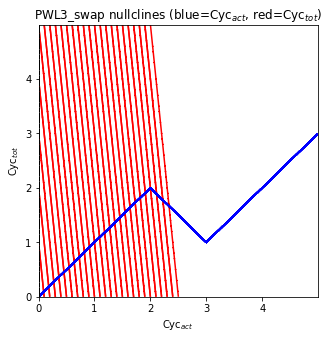

In [27]:
# Define the meta data for the movie
FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='Movie Test', artist='Matplotlib',
                comment='a red circle following a blue sine wave')
writer = FFMpegWriter(fps=15, metadata=metadata)

fig = plt.figure(figsize=(5,5))
ax = plt.gca()

with writer.saving(fig, "writer_test.mp4", 100):
    for t in np.linspace(0,100,101):
        kwargs_PWL3_swap['z'] = pulse(t)
        nullclines_general(sc_template_PWL3_swap, ax=ax, delta=0.01, axlow=0, axhigh=5, contour_labels=False, **kwargs_PWL3_swap)
        writer.grab_frame()

# Redo more manually to have nullcline not be copied

In [74]:
from plotting_vectorfield import nullclines_general, XY_meshgrid, nan_mask

import matplotlib.pyplot as plt
import numpy as np
import os

from class_singlecell import SingleCell
from dynamics_generic import simulate_dynamics_general
from dynamics_vectorfields import set_ode_params, set_ode_vectorfield, ode_integration_defaults, PWL_I_of_t_pulse
from settings import STYLE_DYNAMICS, DIR_OUTPUT, PLOT_XLABEL, PLOT_YLABEL

In [75]:
PLOT_XLABEL = r'Cyc$_{act}$'
PLOT_YLABEL = r'Cyc$_{tot}$'

sc_template = SingleCell(style_ode='PWL3_swap')
sc_template.params_ode['gamma'] = 1e-1
sc_template.params_ode['t_pulse_switch'] = 30


kwargs_PWL3_swap = {
    't': 0,    # this should have no affect on the autonomous equations
    'z': 0,  # note z represents the x-intercept of the dydt=0 nullcline
    'w': 0     # currently this has no affect
}

def pulse(t):
    return PWL_I_of_t_pulse(sc_template.params_ode, t)

In [76]:
def nullclines_general_noplot(sc_template, flip_axis=False, contour_labels=True,
                              delta=0.1, axlow=0.0, axhigh=120.0, **ode_kwargs):
    """
    ode_kwargs
        't': optional parameter for PWL
        'z': optional parameter for Yang2013
    """
    X, Y = XY_meshgrid([axlow, axhigh], [axlow, axhigh], delta)
    init_cond = [X, Y]
    if sc_template.dim_ode > 2:
        for idx in range(2, sc_template.dim_ode):
            print('...')
            if idx == 2:
                z = ode_kwargs.get('z', 0)
                Z = z * np.ones_like(X)
                init_cond.append(Z)
            else:
                assert idx == 3
                w = ode_kwargs.get('w', 0)
                W = w * np.ones_like(X)
                init_cond.append(W)

    params = sc_template.params_ode
    dXdt = set_ode_vectorfield(sc_template.style_ode, params, init_cond, **ode_kwargs)
    U = dXdt[0]
    V = dXdt[1]

    U = nan_mask(U)
    V = nan_mask(V)
    
    return X, Y, U, V
    

...
...


C:\Users\MATTSM~1\AppData\Local\Temp/ipykernel_10984/822731415.py:31: UserWarning: No contour levels were found within the data range.
  nullcline_v = ax.contour(X, Y, V, (0,), colors='r', linewidths=1.5)


(1500, 1500)
...
(1500, 1500)
...
(1500, 1500)
...
(1500, 1500)
...
(1500, 1500)
...
(1500, 1500)
...
(1500, 1500)
...
(1500, 1500)
...
(1500, 1500)
...
(1500, 1500)
...
(1500, 1500)
...
(1500, 1500)
...
(1500, 1500)
...
(1500, 1500)
...
(1500, 1500)
...
(1500, 1500)
...
(1500, 1500)
...
(1500, 1500)
...
(1500, 1500)
...
(1500, 1500)
...
(1500, 1500)
...
(1500, 1500)
...
(1500, 1500)
...
(1500, 1500)
...
(1500, 1500)
...
(1500, 1500)
...
(1500, 1500)
...
(1500, 1500)
...
(1500, 1500)
...
(1500, 1500)
...
(1500, 1500)
...
(1500, 1500)
...
(1500, 1500)
...
(1500, 1500)
...
(1500, 1500)
...
(1500, 1500)
...
(1500, 1500)
...
(1500, 1500)
...
(1500, 1500)
...
(1500, 1500)
...
(1500, 1500)
...
(1500, 1500)
...
(1500, 1500)
...
(1500, 1500)
...
(1500, 1500)
...
(1500, 1500)
...
(1500, 1500)
...
(1500, 1500)
...
(1500, 1500)
...
(1500, 1500)
...
(1500, 1500)
...
(1500, 1500)
...
(1500, 1500)
...
(1500, 1500)
...
(1500, 1500)
...
(1500, 1500)
...
(1500, 1500)
...
(1500, 1500)
...
(1500, 1500)
.

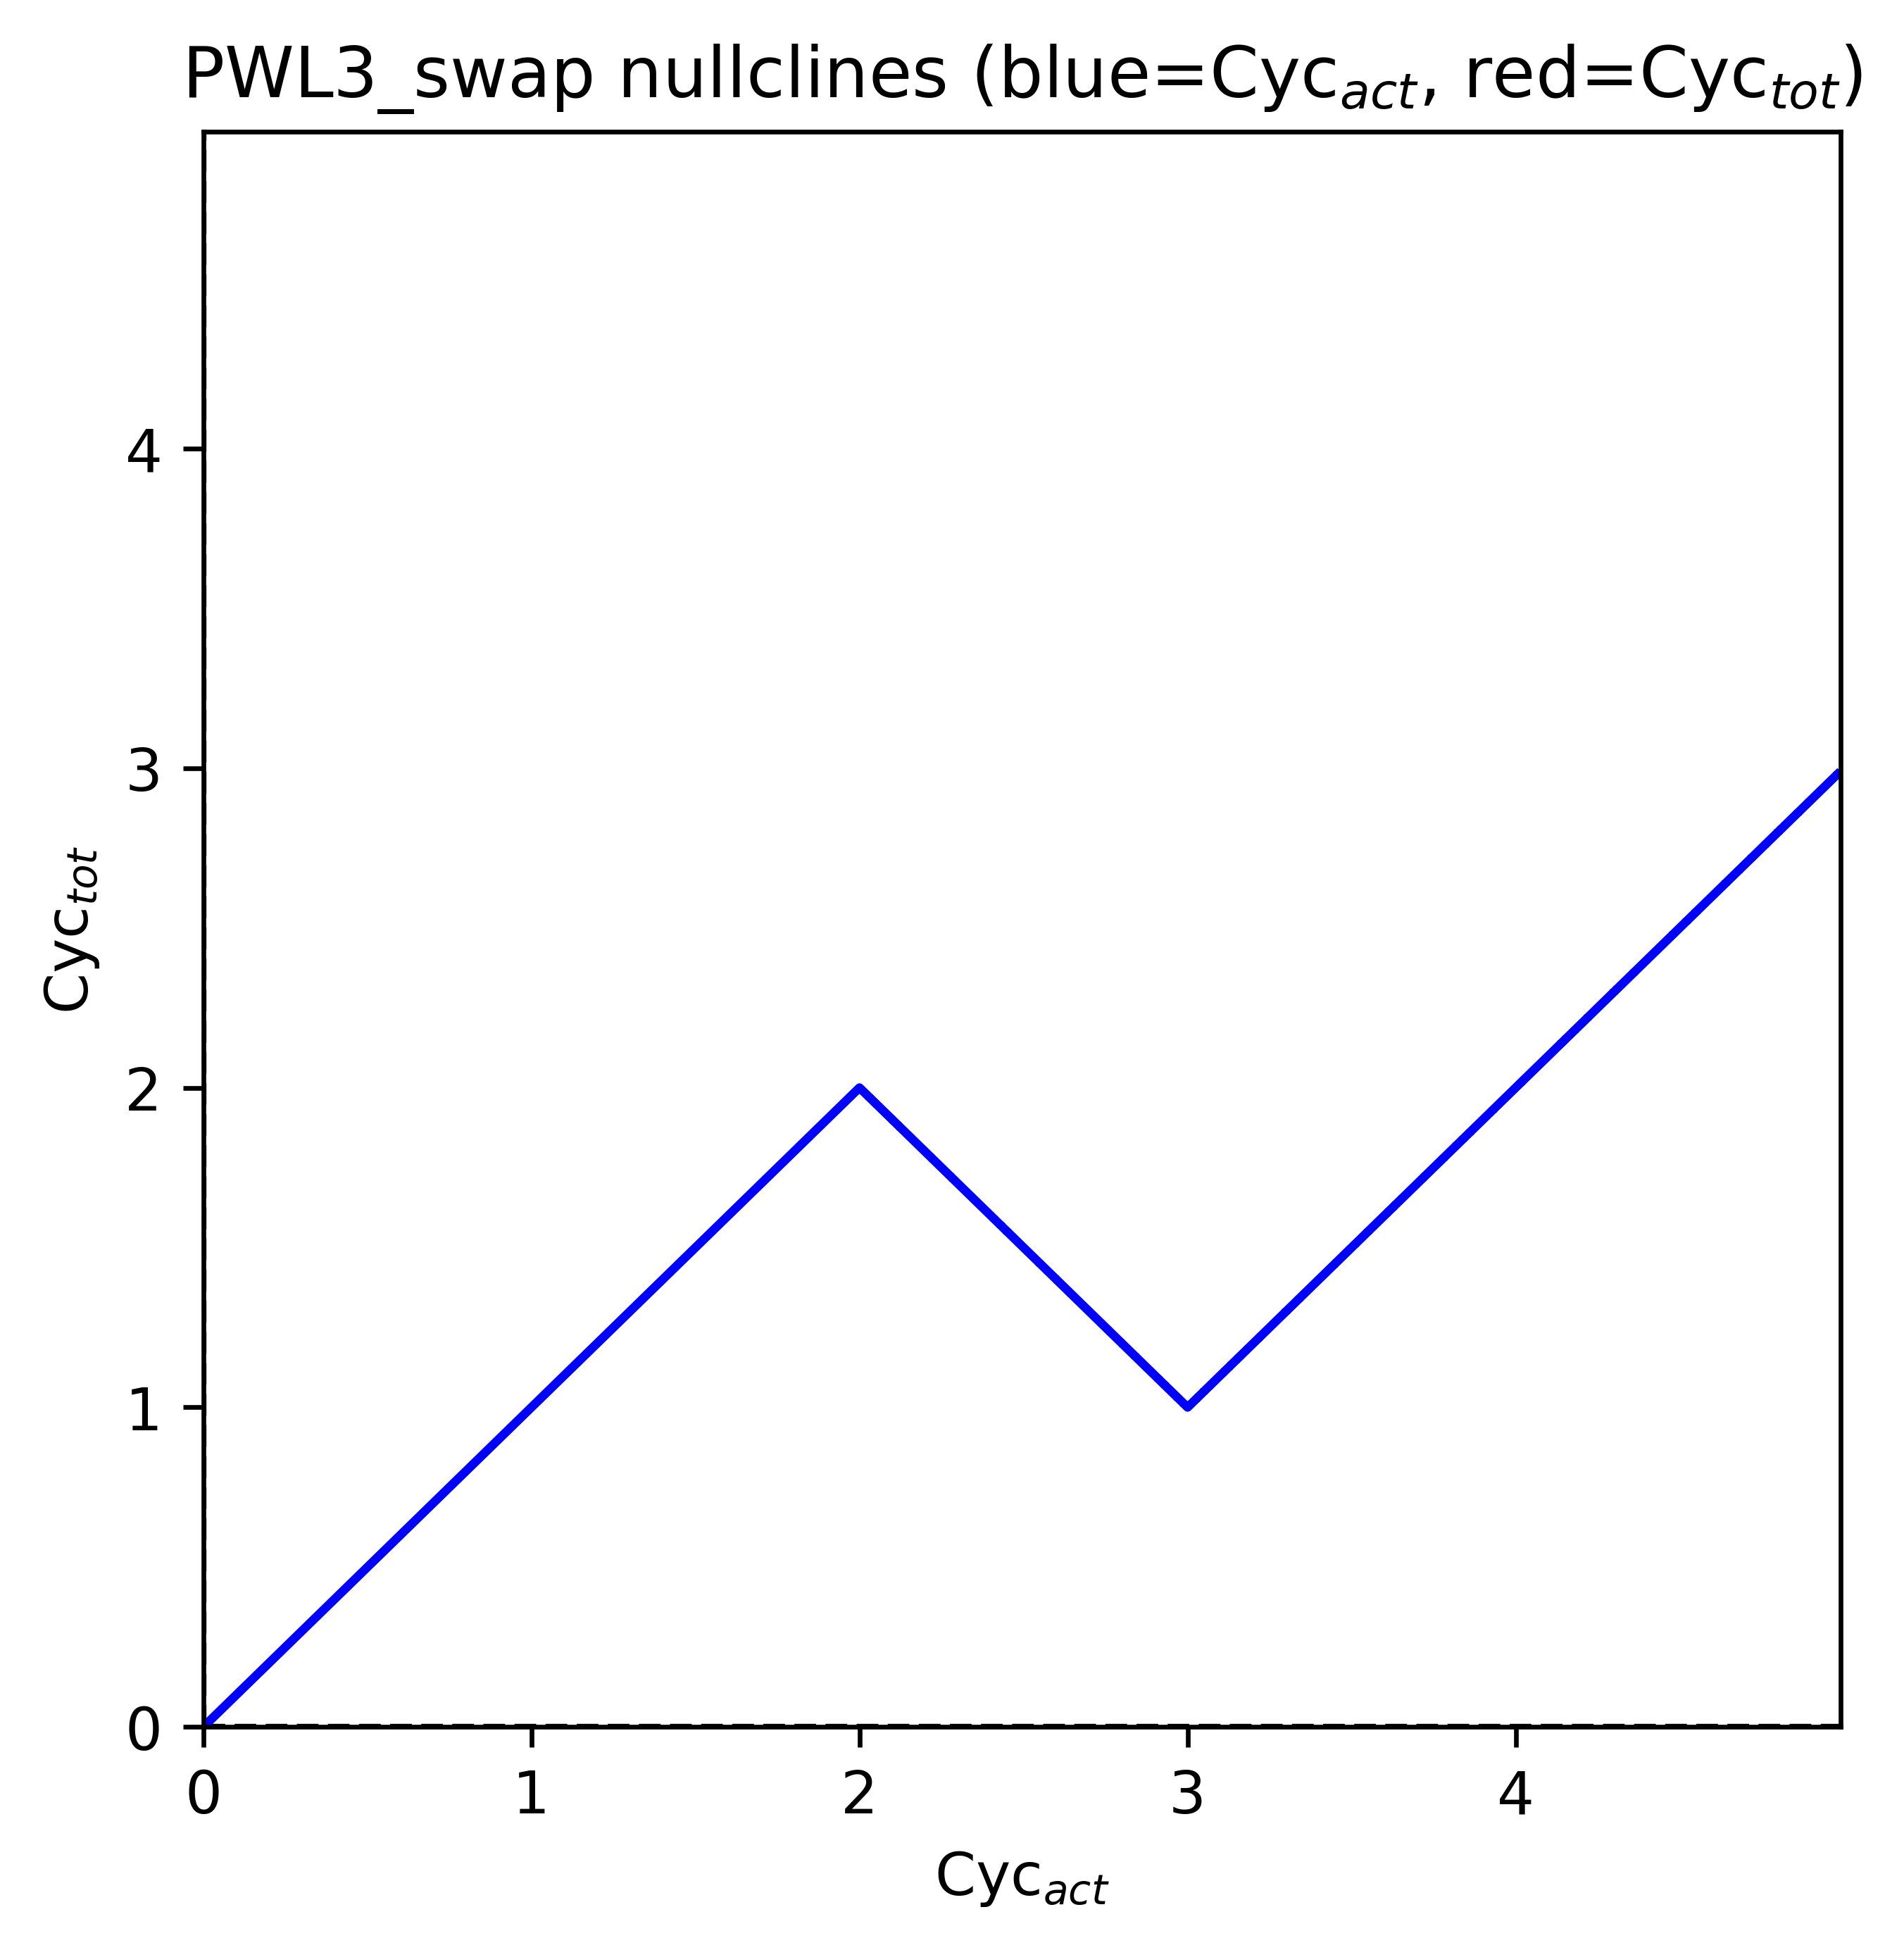

In [81]:
# Define the meta data for the movie
FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='Movie Example', 
                artist='Matplotlib',
                comment='ODE nullclines')
writer = FFMpegWriter(fps=15, metadata=metadata, bitrate=3000)

fig = plt.figure(figsize=(5,5), dpi=600)
ax = plt.gca()

# fixed objects
# gridlines
plt.axhline(0, linewidth=1, color='k', linestyle='--')
plt.axvline(0, linewidth=1, color='k', linestyle='--')
# plot labels
ax.set_title('%s nullclines (blue=%s, red=%s)' % (sc_template.style_ode, PLOT_XLABEL, PLOT_YLABEL))
ax.set_xlabel(PLOT_XLABEL)
ax.set_ylabel(PLOT_YLABEL)

# plot nullclines
X, Y, U, V = nullclines_general_noplot(sc_template, delta=0.01, axlow=0, axhigh=5, contour_labels=False, **kwargs_PWL3_swap)
nullcline_u = ax.contour(X, Y, U, (0,), colors='b', linewidths=1.5)
# To add contour label:
#ax.clabel(nullcline_u, inline=1, fmt='X nc', fontsize=10)


with writer.saving(fig, "writer_test_2.mp4", 300):
    for t in np.linspace(0,80,201):
        kwargs_PWL3_swap['z'] = pulse(t)
        X, Y, U, V = nullclines_general_noplot(sc_template, delta=0.01, axlow=0, axhigh=5, contour_labels=False, **kwargs_PWL3_swap)
        nullcline_v = ax.contour(X, Y, V, (0,), colors='r', linewidths=1.5)
        writer.grab_frame()
        # remove contour after frame
        print(writer.frame_size)

        for coll in nullcline_v.collections: 
            ax.collections.remove(coll) 

In [82]:
# don't worry about the code in this cell, it is just to let you 
# display the movies you generated above in Jupyter notebook
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="writer_test_2.mp4" type="video/mp4">
</video></div>""")